# Simple IR System

The following tasks have to be accomplished in order to build a simple IR system

## Data Collection

The NLTK package includes a nice list of documents that can be loaded.

## Data Preprocessing
In order to provide a common basis for information retrieval, in the following we have to execute some preprocessing steps.

### Tokenisation

With respect to tokenization, three options are available. 
1. Use integrated nltk tokens
2. Create own simple tokenizer
3. Implement tokenizer based on pos tags

For the beginning, we just use the integrated tokenizer and use the provided documents as is. 

### Casefolding

Casefolding tries to create a common case for all documents. Basically there are two options:
1. tolower() - which simply translates all capital case letters to lower case
2. casefold() - which also translates common letters 


In [1]:
import nltk

# download all necessary corpora to current directory
nltk.download(["gutenberg", "stopwords"])

[nltk_data] Downloading package gutenberg to /Users/bekal/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/bekal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:

# get a list of all files in corpus
ids = nltk.corpus.gutenberg.fileids()

# load all files from gutenberg corpus
def load_corpus():
    return [nltk.corpus.gutenberg.words(id) for id in ids]

print("list of files:")
ids

list of files:


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
# casefold each word in file
def casefold_file(file):
    return [word.casefold() for word in file]

# Test 
testText = "This is a Test TexT For Casefolding with SpeciAl cHARACTERS"

testList = testText.split()
cf_testfile = casefold_file(testList)

print("before casefolding:", testText)
print("after  casefolding:", ' '.join(cf_testfile))

before casefolding: This is a Test TexT For Casefolding with SpeciAl cHARACTERS
after  casefolding: this is a test text for casefolding with special characters


In [4]:
"""
unction that caseFolds text

"""
def casefold_corpus(corpus):
    return [casefold_file(file) for file in corpus]

## Normalisation


- assuming special characters are not helpful for the query, we need to remove them. 
- remove special characters that do not contribute much to the search
- we can use a regular expression `re` to remove texts that have specific patterns.
- we can easily define regular expression formulas to remove specific set of characters from text. 

In [5]:
import re
# regular expression pattern to remove special characters and empty space
characters_to_remove = "[\[\]\(\){},.!\?;:\-_'\"]"


"""
Iterate over files & clean - remove empty strings & special characters

"""
def clean_file(file, removelist):
    return [token for token in [re.sub(removelist,'',word) for word in file] 
            if token != '']

# test  
testText = "! this, is a :;-_!) test sentence"
TestList = testText.split()

clean_text = clean_file(testText, characters_to_remove)

print("text before cleaning:", testText)
print("text after  cleaning:", ''.join(clean_text))

text before cleaning: ! this, is a :;-_!) test sentence
text after  cleaning:  this is a  test sentence


In [6]:

""" 
function: cleans files in the corpus ( collection of documents)

"""

def clean_corpus(files):
    return [clean_file(file,characters_to_remove) for file in files]

### Stop word removal

- just like stop words assume stopwords like 'the', 'is', 'are', ...etc. do not have semantic value for for querying documents 
- hence remove stop words as well
- a collection of stop words,for different languages, can be downloaded from nltk
- removing the stop words helps to speed up our query
- `Zip's law` shows that most of the words in a text are stop words

In [7]:
stopwords_en = nltk.corpus.stopwords.words("english")

# select words that are not in the stopword list

def filter_words(file, wordlist):
   result = []
   for word in file:
       if not word in wordlist:
           result.append(word)
   return result

# test implementation
testText_stopwords = "This is a test text with some stop words that has to be removed by some means"
testText_stopwords_LS = testText_stopwords.split()

text_after_stopWord = filter_words(testText_stopwords_LS, stopwords_en)


print("Before removing stopwords:", testText_stopwords)
print("Before removing stopwords:", ' '.join(text_after_stopWord))

Before removing stopwords: This is a test text with some stop words that has to be removed by some means
Before removing stopwords: This test text stop words removed means


In [8]:
# removes all stop words from the entire corpus
def remove_stopwords_corpus(corpus):
    return[filter_words(file, stopwords_en) for file in corpus]

### Stemming


- stemming keeps the root of the word
- for the serach query a word and its variation should not make much difference
- e.g. the words: `Test`, `testing`, `tested` will just be chnaged to to `test`, but the frequency is kept
- there are different kinds of stemmers: we an use porter's stemmer

In [9]:
# Use Porter's stemmer to stem all tokens in all files
ps = nltk.stem.PorterStemmer()

# stems all words in a file
def stem_file(file):
    return [ps.stem(token) for token in file]

# test the implementation
testfile = "Test testing tests tested are all variations of Test"
testfile_ls = testfile.split()

st_testfile = stem_file(testfile_ls)

print("before stemming:", testfile)
print("after  stemming:", ' '.join(st_testfile))

before stemming: Test testing tests tested are all variations of Test
after  stemming: test test test test are all variat of test


In [10]:
def stem_corpus(corpus):
    return [stem_file(file) for file in corpus]

## Prepare the Corpus for IR

`toknization` - nltk tokens 

#### custom functions 

`casefold_corpus` 
`clean_corpus`
`remove_stopwords_corpus`
`stem_corpus`


- using the above list of functions, we can now clean and prepare the texts

In [11]:
# We use pandas here as it provides some nice functionality for showing tables
import pandas as pd
import collections

# Functions returns statistics about all files in the corpus
def report(corpus):
    return ["%s / %s" % (len(document), len(collections.Counter(document))) for document in corpus]


# Header of the table
df = pd.DataFrame(columns=nltk.corpus.gutenberg.fileids())

# load the corpus and report number words and unique number of words
corpus = load_corpus()
df.loc["raw"] = report(corpus)

# casefold all words and report statistics
corpus = casefold_corpus(corpus)
df.loc["case"] = report(corpus)

corpus = clean_corpus(corpus)
df.loc["clean"] = report(corpus)

corpus = remove_stopwords_corpus(corpus)
df.loc["stop words"] = report(corpus)

corpus = stem_corpus(corpus)
df.loc["stemming"] = report(corpus)


print("the document after cleaning: \n")

df

the document after cleaning: 



,austen-emma.txt,austen-persuasion.txt,austen-sense.txt,bible-kjv.txt,blake-poems.txt,bryant-stories.txt,burgess-busterbrown.txt,carroll-alice.txt,chesterton-ball.txt,chesterton-brown.txt,chesterton-thursday.txt,edgeworth-parents.txt,melville-moby_dick.txt,milton-paradise.txt,shakespeare-caesar.txt,shakespeare-hamlet.txt,shakespeare-macbeth.txt,whitman-leaves.txt
raw,192427 / 7811,98171 / 6132,141576 / 6833,1010654 / 13769,8354 / 1820,55563 / 4420,18963 / 1764,34110 / 3016,96996 / 8947,86063 / 8299,69213 / 6807,210663 / 9593,260819 / 19317,96825 / 10751,25833 / 3560,37360 / 5447,23140 / 4017,154883 / 14329
case,192427 / 7344,98171 / 5835,141576 / 6403,1010654 / 12767,8354 / 1535,55563 / 3940,18963 / 1559,34110 / 2636,96996 / 8335,86063 / 7794,69213 / 6349,210663 / 8447,260819 / 17231,96825 / 9021,25833 / 3032,37360 / 4716,23140 / 3464,154883 / 12452
clean,162095 / 7105,84201 / 5779,120795 / 6339,854046 / 12744,6953 / 1513,46715 / 3838,16359 / 1527,27396 / 2571,82938 / 8246,73355 / 7740,58732 / 6306,170879 / 8345,218668 / 17142,80509 / 8982,20881 / 3020,30296 / 4702,18370 / 3452,126606 / 12406
stop words,73412 / 6974,38417 / 5646,54048 / 6204,437149 / 12619,3824 / 1403,21790 / 3700,7594 / 1388,12301 / 2425,39937 / 8098,35417 / 7592,28336 / 6165,78273 / 8196,110766 / 16996,45584 / 8856,11135 / 2917,15928 / 4593,10176 / 3345,65410 / 12271
stemming,73412 / 4377,38417 / 3688,54048 / 3985,437149 / 9418,3824 / 1145,21790 / 2808,7594 / 1126,12301 / 1834,39937 / 5706,35417 / 5435,28336 / 4480,78273 / 5476,110766 / 10716,45584 / 6170,11135 / 2361,15928 / 3653,10176 / 2749,65410 / 8205


# Representing Documents

## Term-Document Matrix

The Term-Document-Matrix allows to store the frequency of each term in each document. 

In [12]:
import collections
import pprint

def summarize_corpus(corpus):
    counters = [collections.Counter(file) for file in corpus]

    # create empty counter
    counter_tmp = collections.Counter()
    
    # iterate counter and sum up
    for c in counters:
        counter_tmp += c
    return (counter_tmp, counters)

# test the implementation
testcorpus = ["This is the text in the first document".split(), "This is the second document".split()]
testcorpus_counter, testcorpus_documents = summarize_corpus(testcorpus)
print('\n\n')
pp = pprint.PrettyPrinter(indent=15)
print("Information about the entire corpus:")
pp.pprint(testcorpus_counter)
print('\n\n')


print("Information about each document:")
pp.pprint(testcorpus_documents)




Information about the entire corpus:
Counter({              'the': 3,
                       'This': 2,
                       'is': 2,
                       'document': 2,
                       'text': 1,
                       'in': 1,
                       'first': 1,
                       'second': 1})



Information about each document:
[              Counter({              'the': 2,
                                      'This': 1,
                                      'is': 1,
                                      'text': 1,
                                      'in': 1,
                                      'first': 1,
                                      'document': 1}),
               Counter({              'This': 1,
                                      'is': 1,
                                      'the': 1,
                                      'second': 1,
                                      'document': 1})]


In [13]:
# Run corpus summary on each document
counter_corpus, counters_documents = summarize_corpus(corpus)
print("The corpus consists of", sum(counter_corpus.values()), "tokens and", len(counter_corpus), "terms.")
print("The dimension of the respective TDM is", len(corpus), "times", len(counter_corpus))

The corpus consists of 1089497 tokens and 25823 terms.
The dimension of the respective TDM is 18 times 25823


### Create the Term-Document Matrix
The Term-Document Matrix ist created by first getting the number of unique words among the entire corpus and then collecting the frequencies of those in the respective documents.

The function is then applied to the small text corpus.

In [14]:
import numpy as np

# create a Term Document Matrix from the corpus
def create_term_document_matrix(corpus):
    # get the summary of the corpus
    counter_corpus, counter_documents = summarize_corpus(corpus)
    
    # create an empty matrix with the correct dimension
    tdm = np.zeros((len(counter_corpus),len(corpus)))

    for idx, word in enumerate(counter_corpus):
        for document_id in range(len(corpus)):
            if word in counter_documents[document_id]:
                tdm[idx,document_id] = counter_documents[document_id][word]
    return (tdm,list(counter_corpus.keys()))
            
# test the implementation
test_tdm, test_names = create_term_document_matrix(testcorpus)

df = pd.DataFrame(test_tdm, index=test_names)
df

,0,1
This,1.0,1.0
is,1.0,1.0
the,2.0,1.0
text,1.0,0.0
in,1.0,0.0
first,1.0,0.0
document,1.0,1.0
second,0.0,1.0


In the resulting Term-Document Matrix it can be seen which words are contained in with documents. The word _first_ for instance is in _document 0_, only while the word _This_ is in both documents.

We now create the matrix for the preprocessed corpus of gutenberg documents. 

In [47]:
# create the actual TDM from the corpus
tdm, names = create_term_document_matrix(corpus)
tdm_df = pd.DataFrame(tdm, index=names, columns=nltk.corpus.gutenberg.fileids())

tdm_df[["austen-emma.txt"]]

,austen-emma.txt
emma,865.0
jane,301.0
austen,1.0
1816,1.0
volum,3.0
...,...
glum,0.0
demarc,0.0
cumul,0.0
germin,0.0


In [50]:
tdm_df

,austen-emma.txt,austen-persuasion.txt,austen-sense.txt,bible-kjv.txt,blake-poems.txt,bryant-stories.txt,burgess-busterbrown.txt,carroll-alice.txt,chesterton-ball.txt,chesterton-brown.txt,chesterton-thursday.txt,edgeworth-parents.txt,melville-moby_dick.txt,milton-paradise.txt,shakespeare-caesar.txt,shakespeare-hamlet.txt,shakespeare-macbeth.txt,whitman-leaves.txt
emma,865.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jane,301.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
austen,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
volum,3.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,15.0,0.0,2.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
glum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
demarc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
cumul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
germin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
tdm

array([[865.,   1.,   0., ...,   0.,   0.,   0.],
       [301.,   1.,   1., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.]])

In [34]:
terms = len(names)
terms

25823

### Querying the Term-Document matrix

In order to check whether a document satifies a query or not, the query has to be preprocessed in the same way as we did with the entire corpus. This means we have to execute the follwoing steps:
1. casefold each word in the query
2. remove unnecessary characters in the query
3. remove stop words in the query
4. stem the words in the query

After the implementation, the query is tested on small test query.

#### Query processing 

In [18]:
# we have to prepare the query in the same way as we did for the document
# query porcessing 

def prepare_query(query):
    query = casefold_file(query)
    query = clean_file(query, characters_to_remove)
    query = filter_words(query, stopwords_en)
    query = [ps.stem(word) for word in query]
    return query

# test the method
testquery = "This is a query, which aims a testing".split()
pq_testquery = prepare_query(testquery)
print("The result of preparing the query:", pq_testquery)

The result of preparing the query: ['queri', 'aim', 'test']


### Query execution
To execute the query on the TDM, the score for each document has to be calculated. The score is thereby defined as the sum of the cells for the words of the query. As result, for each document, the number of words from the query which are contained in the document is provided.

In [19]:
def query_documents(tdm, names, query):
    idxs = [names.index(word) for word in query if word in names]
    return tdm[idxs].sum(axis=0)

# test 
testquery = prepare_query("Second document".split())
result1 = query_documents(test_tdm, test_names, testquery)
print("Result for query", testquery, "is", result1)

# testquery2 = prepare_query("Second text".split())
# result2 = query_documents(test_tdm, test_names, testquery2)
# print("Result for query", testquery2, "is", result2)

# testquery3 = prepare_query("unrelated text".split())
# result3 = query_documents(test_tdm, test_names, testquery3)
# print("Result for query", testquery3, "is", result3)

Result for query ['second', 'document'] is [1. 2.]


## mapping to Documents to score of relevance 

In [42]:
dict_map = {}

scores = list(result1)
docIDs = ["Doc1", "Doc2"]


for score, id in zip(scores, docIDs):

    dict_map[id] = score

dict_map

{'Doc1': 1.0, 'Doc2': 2.0}

In [45]:
terms = names
len(terms)
terms[:3]

['emma', 'jane', 'austen']

The resulting score can easily be plotted by use of barcharts, as the following implementation shows. The implementation is checked on the small test corpus.

In [21]:
#show results in a nice form
import matplotlib.pyplot as plt;
plt.style.use('dark_background')


def show_results(res, document_names=[], query=[]):
    """
    function takes

    """
    if (len(document_names) != len(res)):
        document_names = range(len(res))
        
    plt.bar(range(len(res)), res)
    plt.xticks(range(len(res)), document_names, rotation=90)
    
    plt.title("Query:" + " ".join(query))
    plt.show()

#show_results(result1, ["First Document", "Second Document"], testquery)

Running a query on the entire corpus reveals that Austen's _Emma_ has the highest score, followed by Shakespeares' _Caesar_.
The reason is that the document _Emma_ contains the word _Emma_ more than 800 times. The words _Caesar_ and _Brutus_ occur together about 400 times in the document _Caesar_. 
As a result, the document _Emma_ is twice as relevant as the document _Caesar_ for the given query.

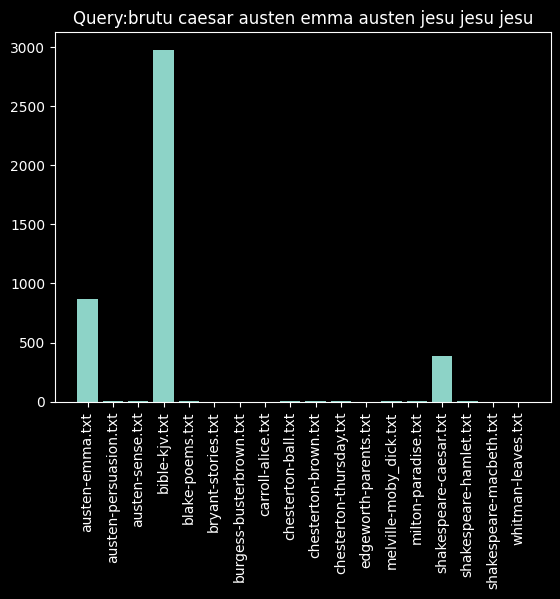

In [22]:
query = ["Brutus", "Caesar", "Austen", "the", "The", ";", "Emma", "Austen", "Jesus", "Jesus", "Jesus"]
plt.style.use('dark_background')

query = prepare_query(query)
results_unscaled = query_documents(tdm, names, query)

show_results(results_unscaled, nltk.corpus.gutenberg.fileids(), query)

In [23]:
results_unscaled

array([8.670e+02, 3.000e+00, 2.000e+00, 2.979e+03, 3.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
       8.000e+00, 6.000e+00, 3.890e+02, 3.000e+00, 1.000e+00, 0.000e+00])

In [24]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

## Log Scaled TF-IDF


This weighting reveals a problem with the term-frequency ranking, as documents where words from query occur twice as often as in other documents result in the double weight. A typical way to change this linear dependency is to use the logarithm. In the following the logarithm is implemented for scaling.
Two changes can be observed from the results:
1. The scores of both document are much closer to each other 
2. The score of _Caesar_ is higher than the score of _Emma_

This is a direct result of the summation of the logarithmic transformed weights.

### Adjusting Term-Frequency with logarithm

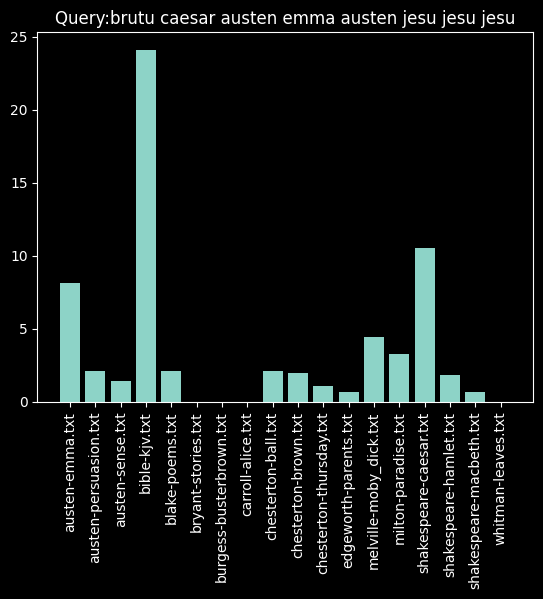

In [25]:
def scale_tf(m):
    return np.log1p(m)

tdm_tf = scale_tf(tdm)
#tdm_tf = np.log(test_tdm)
res_tf = query_documents(tdm_tf, names, query)

show_results(res_tf, nltk.corpus.gutenberg.fileids(), query)
plt.style.use('dark_background')


# TF-IDF

## Further Adjustments with Inverse-Document-Frequency

As discussed elsewhere, term-frequency weighting has some negative effects if for words that occur often in the entire corpus. One approach to compensate for this behaviour is to use the the inverse document frequency.

The following implementation takes an unscaled TDM and applies the tf-idf scaling on the matrix.

In [26]:
def scale_tfidf(m):
    m = scale_tf(m)
    tmp = m!=0
    num_documents = m.shape[1]
    
    idf = np.log(num_documents/m.sum(axis=1))
    return (m.T * idf).T

# test implementation
test_tdm_tfidf = scale_tfidf(test_tdm)
r = query_documents(test_tdm_tfidf, test_names, testquery)
#show_results(r, query=testquery, document_names=["First document", "Second document"])
#plt.style.use('dark_background')

Applying the TF-IDF weighting to the corpus shows again that the document _Emma_ is slightly more relevant as the document _Caesar_. The reason is that the words _Caesar_ and _Brutus_ appear more often in the corpus than the word _Emma_.

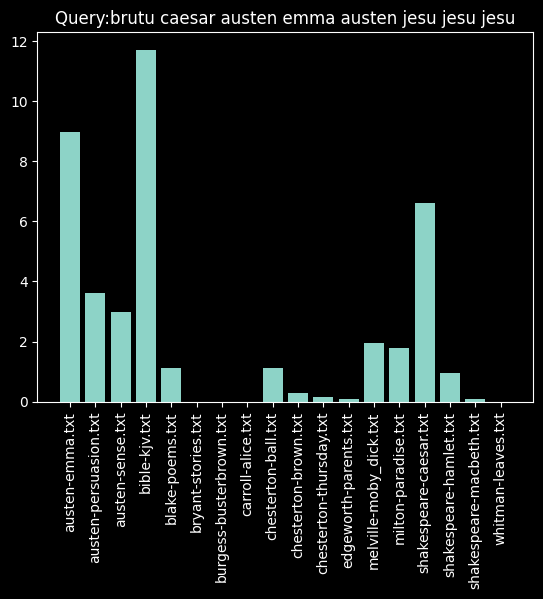

In [27]:
# scale Term-document matrix
tdm_tfidf = scale_tfidf(tdm)
results_tfidf = query_documents(tdm_tfidf, names, query)
show_results(results_tfidf, query=query, document_names=nltk.corpus.gutenberg.fileids())
plt.style.use('dark_background')

## Mapping file names to score and show by order of relevance

In [28]:
import numpy as np

# Given score array and file_names list
score = np.array([8.670e+02, 3.000e+00, 2.000e+00, 2.979e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 8.000e+00, 6.000e+00, 3.890e+02, 3.000e+00, 1.000e+00, 0.000e+00])
file_names = ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

# Create a dictionary mapping file names to scores
file_score_mapping = {file_names[i]: score[i] for i in range(len(file_names))}

# Sort the file names based on scores in descending order
sorted_files = sorted(file_score_mapping, key=file_score_mapping.get, reverse=True)

# Display the results
for file in sorted_files:
    print(f"Document: {file} - Score: {file_score_mapping[file]}")


Document: bible-kjv.txt - Score: 2979.0
Document: austen-emma.txt - Score: 867.0
Document: shakespeare-caesar.txt - Score: 389.0
Document: melville-moby_dick.txt - Score: 8.0
Document: chesterton-brown.txt - Score: 6.0
Document: milton-paradise.txt - Score: 6.0
Document: austen-persuasion.txt - Score: 3.0
Document: blake-poems.txt - Score: 3.0
Document: chesterton-ball.txt - Score: 3.0
Document: shakespeare-hamlet.txt - Score: 3.0
Document: austen-sense.txt - Score: 2.0
Document: chesterton-thursday.txt - Score: 2.0
Document: edgeworth-parents.txt - Score: 1.0
Document: shakespeare-macbeth.txt - Score: 1.0
Document: bryant-stories.txt - Score: 0.0
Document: burgess-busterbrown.txt - Score: 0.0
Document: carroll-alice.txt - Score: 0.0
Document: whitman-leaves.txt - Score: 0.0


## normalize relevance score out of 100%

In [29]:
import numpy as np

# Given score array
score = np.array([8.670e+02, 3.000e+00, 2.000e+00, 2.979e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 8.000e+00, 6.000e+00, 3.890e+02, 3.000e+00, 1.000e+00, 0.000e+00])

# Normalize the scores to a percentage scale
normalized_scores = (score / np.sum(score)) * 100

# Sort the normalized scores and file names in descending order
sorted_indices = np.argsort(normalized_scores)[::-1]
sorted_files_by_percentage = [file_names[i] for i in sorted_indices]
sorted_normalized_scores = normalized_scores[sorted_indices]

# Display the results
for i in range(len(sorted_files_by_percentage)):
    print(f"Document: {sorted_files_by_percentage[i]} - Normalized Score (%): {sorted_normalized_scores[i]}")

Document: bible-kjv.txt - Normalized Score (%): 69.71682658553709
Document: austen-emma.txt - Normalized Score (%): 20.290194242920663
Document: shakespeare-caesar.txt - Normalized Score (%): 9.103674233559559
Document: melville-moby_dick.txt - Normalized Score (%): 0.1872220922068804
Document: chesterton-brown.txt - Normalized Score (%): 0.14041656915516032
Document: milton-paradise.txt - Normalized Score (%): 0.14041656915516032
Document: austen-persuasion.txt - Normalized Score (%): 0.07020828457758016
Document: blake-poems.txt - Normalized Score (%): 0.07020828457758016
Document: chesterton-ball.txt - Normalized Score (%): 0.07020828457758016
Document: shakespeare-hamlet.txt - Normalized Score (%): 0.07020828457758016
Document: chesterton-thursday.txt - Normalized Score (%): 0.0468055230517201
Document: austen-sense.txt - Normalized Score (%): 0.0468055230517201
Document: shakespeare-macbeth.txt - Normalized Score (%): 0.02340276152586005
Document: edgeworth-parents.txt - Normalize

## Mapping in the databse

In [30]:
import numpy as np

# Populated 'documents' dictionary with random values for demonstration
documents = {
    1: "This is the textual content of document 1.",
    2: "Here is the content of document 2, containing relevant information.",
    3: "Document 3 has some important details that might be useful.",
    4: "The fourth document has additional information that can be analyzed.",
    5: "Document number 5 contains various data points for analysis.",
    6: "This is the content of the sixth document, providing essential insights.",
    7: "The seventh document's content is rich with valuable information.",
    8: "Document 8 includes important details that need careful examination.",
    9: "The ninth document is a comprehensive source of relevant data.",
    10: "This is the tenth document, containing crucial information for the analysis.",
    11: "The eleventh document is an essential piece of the overall dataset.",
    12: "Document 12 provides insightful information for the research.",
    13: "This is the content of document 13, contributing to the project's findings.",
    14: "The fourteenth document offers valuable insights and perspectives.",
    15: "Document 15 contains data that can be analyzed for meaningful conclusions.",
    16: "The sixteenth document's content plays a crucial role in the analysis.",
    17: "This is the seventeenth document, providing critical information for the study.",
    18: "The eighteenth document is an essential part of the dataset for analysis."
}

# Given score array
score = np.array([8.670e+02, 3.000e+00, 2.000e+00, 2.979e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 8.000e+00, 6.000e+00, 3.890e+02, 3.000e+00, 1.000e+00, 0.000e+00])

# Normalize the scores to a percentage scale
normalized_scores = (score / np.sum(score)) * 100

# Assuming you have a list of document IDs corresponding to the scores
document_ids = list(documents.keys())

# Sort the document IDs based on normalized scores in descending order
sorted_indices = np.argsort(normalized_scores)[::-1]
sorted_document_ids = [document_ids[i] for i in sorted_indices]
sorted_normalized_scores = normalized_scores[sorted_indices]

# Fetch and display the documents based on the sorted document IDs
for i in range(len(sorted_document_ids)):
    document_id = sorted_document_ids[i]
    document_content = documents[document_id]
    print(f"Document ID: {document_id} - Normalized Score (%): {sorted_normalized_scores[i]} - Content: {document_content}")


Document ID: 4 - Normalized Score (%): 69.71682658553709 - Content: The fourth document has additional information that can be analyzed.
Document ID: 1 - Normalized Score (%): 20.290194242920663 - Content: This is the textual content of document 1.
Document ID: 15 - Normalized Score (%): 9.103674233559559 - Content: Document 15 contains data that can be analyzed for meaningful conclusions.
Document ID: 13 - Normalized Score (%): 0.1872220922068804 - Content: This is the content of document 13, contributing to the project's findings.
Document ID: 10 - Normalized Score (%): 0.14041656915516032 - Content: This is the tenth document, containing crucial information for the analysis.
Document ID: 14 - Normalized Score (%): 0.14041656915516032 - Content: The fourteenth document offers valuable insights and perspectives.
Document ID: 2 - Normalized Score (%): 0.07020828457758016 - Content: Here is the content of document 2, containing relevant information.
Document ID: 5 - Normalized Score (%)

In [31]:
import numpy as np
import psycopg2

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    dbname="your_dbname",
    user="your_username",
    password="your_password",
    host="your_host",
    port="your_port"
)
cur = conn.cursor()

# Given score array and file_names list
score = np.array([8.670e+02, 3.000e+00, 2.000e+00, 2.979e+03, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 8.000e+00, 6.000e+00, 3.890e+02, 3.000e+00, 1.000e+00, 0.000e+00])
file_names = ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

# Normalize the scores to a percentage scale
normalized_scores = (score / np.sum(score)) * 100

# Create a dictionary mapping file names to normalized scores
file_normalized_score_mapping = {file_names[i]: normalized_scores[i] for i in range(len(file_names))}

# Sort the file names based on normalized scores in descending order
sorted_files_by_percentage = sorted(file_normalized_score_mapping, key=file_normalized_score_mapping.get, reverse=True)

# Iterate over the sorted file names and retrieve data from the database
for file in sorted_files_by_percentage:
    cur.execute("SELECT * FROM your_table WHERE filename = %s", (file,))
    result = cur.fetchone()
    # Process the database result as needed
    print(f"Document: {file} - Normalized Score (%): {file_normalized_score_mapping[file]} - Database Result: {result}")

# Close the cursor and connection
cur.close()
conn.close()




# CREATE TABLE document_scores (
#     id SERIAL PRIMARY KEY,
#     filename VARCHAR(255),
#     score FLOAT
# );


ModuleNotFoundError: No module named 'psycopg2'

In [ ]:
import pandas as pd

# Creating a sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50],
        'C': [100, 200, 300, 400, 500]}

df = pd.DataFrame(data)

# Define the threshold
threshold = 3

# Function to apply the transformation
def categorize_value(x):
    if x < threshold:
        return 'low'
    else:
        return 'high'

# Applying the function to each column of the DataFrame
for col in df.columns:
    df[col] = df[col].apply(categorize_value)

# Printing the updated DataFrame
print(df)